Just considering the new two datasets, and what we can achieve with simple methods.

In [1]:
import pandas as pd
import numpy as np
import subprocess as sb
import os
import pickle

import utils

root_folder="/media/kali/1b80f30d-2803-4260-a792-9ae206084252/Code/M30/data/"
data_folder="../data/"

In [2]:
datasets_di = {}

## Subsets for exploration (without unlabelled samples)

In [13]:
## SUBSET WITHOUT UNLABELLED SAMPLES
## Need to run the corresponding cells in custom_dataset.ipynb otherwise
if (os.path.exists(data_folder+"custom_dataset/A.csv")):
    A = pd.read_csv(data_folder+"custom_dataset/A.csv", index_col=0)
    A.index = A.index.astype(str)
else:
    print("Run notebook custom_dataset.ipynb")
if (os.path.exists(data_folder+"custom_dataset/P.csv") and os.path.exists(data_folder+"custom_dataset/S.csv")):
    P = pd.read_csv(data_folder+"custom_dataset/P.csv", index_col=0)
    S = pd.read_csv(data_folder+"custom_dataset/S.csv", index_col=0)
    S.columns = S.columns.astype(str)
    ## multiply expression values for a same gene in both drug and disease signature
    Known_1 = [[list(A.index)[i], list(A.columns)[j]] for i, j in np.argwhere(A.values==1).tolist()]
    Known_m1 = [[list(A.index)[i], list(A.columns)[j]] for i, j in np.argwhere(A.values==-1).tolist()]
    print("#total negative: %d, #total positive: %d" % (len(Known_m1),len(Known_1)))
    Nknown_1=200 ## majority class
    Nknown_m1=100 ## minority class

    pairs_names = Known_m1[:Nknown_m1]+Known_1[:Nknown_1]
    print("#negative: %d, #positive: %d" % (len(Known_m1[:Nknown_m1]),len(Known_1[:Nknown_1])))
    ## Here, features in S and in P are the same (genes)
    SS = S.loc[S.index][[p[0] for p in pairs_names]]
    PP = P.loc[S.index][[p[1] for p in pairs_names]]
    PP += (-1)**(PP.values<0) ##preserve the sign
    Features = np.multiply(SS,PP)
    Features.columns = ["--".join(p) for p in pairs_names]
    Features = Features.T
else:
    print("Run notebook custom_dataset.ipynb")
Features.head()

#total negative: 174, #total positive: 771
#negative: 100, #positive: 200


,A1CF,A2M,AACS,AADAC,AADAT,AAMDC,AAMP,AAR2,AARD,AARS,...,ZSCAN9,ZSWIM6,ZSWIM8,ZW10,ZWINT,ZXDC,ZYG11B,ZYX,ZZEF1,ZZZ3
145068--C0032285,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,-0.009582,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
5284373--C0014544,0.006304,-0.002591,-0.000174,-0.002253,0.0,-0.005548,-0.017048,-0.006163,0.0,0.030322,...,0.000814,0.0,0.003978,-0.023151,-0.007352,0.012371,0.0,-0.025708,-0.002286,0.012661
54687--C0014544,-0.003060,-0.004392,0.000316,-0.008325,0.0,0.006408,0.001213,-0.001856,0.0,0.014672,...,0.009547,0.0,0.007889,-0.004885,0.001020,0.014016,0.0,0.011977,-0.011953,-0.003614
2284--C0014544,-0.005802,-0.003929,0.002782,0.016020,0.0,0.009123,0.008060,-0.004581,0.0,-0.006278,...,-0.003795,0.0,0.001538,-0.009056,-0.001609,-0.003781,0.0,-0.008824,-0.006532,0.000967
2519--C0014544,-0.007447,0.007845,0.002025,-0.003146,0.0,-0.002169,0.006753,-0.001677,0.0,0.005590,...,-0.004741,0.0,0.002851,-0.009682,0.011514,0.008756,0.0,0.017358,-0.003349,0.002967


In [14]:
if (os.path.exists(data_folder+"custom_dataset/A.csv")):
    A = pd.read_csv(data_folder+"custom_dataset/A.csv", index_col=0)
    A.index = A.index.astype(str)
    A["Drug"] = list(A.index)
    Associations = A.melt(id_vars=["Drug"], var_name=["Disease"], value_name="Class", value_vars=A.columns[:-1])
    Associations.index = [s+"--"+p for s,p in Associations[["Drug","Disease"]].values.tolist()]
    Associations = Associations[["Class"]].loc[Features.index]
else:
    print("Run notebook custom_dataset.ipynb")
Associations.T

,145068--C0032285,5284373--C0014544,54687--C0014544,2284--C0014544,2519--C0014544,5472--C0014544,2481--C0014544,4075--C0014544,2812--C0014544,2153--C0014544,...,104865--C0011644,104865--C3714958,126941--C2936783,126941--C0033860,126941--C0149925,126941--C0023467,126941--C0003873,13342--C0036220,13342--C0153594,4946--C0020538
Class,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [15]:
Features.to_csv("subset_features_TRANSCRIPT.csv")
Associations.to_csv("subset_associations_TRANSCRIPT.csv")

In [18]:
## Need to run the corresponding cells in PREDICT method.ipynb otherwise
if (os.path.exists(data_folder+"Features_PREDICT.csv")):
    Features = pd.read_csv(data_folder+"Features_PREDICT.csv", index_col=0).T
else:
    print("Run notebook PREDICT method.ipynb")
if (os.path.exists(data_folder+"Associations_PREDICT.csv")):
    A = pd.read_csv(data_folder+"Associations_PREDICT.csv", index_col=0)
    A.index = A.index.astype(str)
    A["Drug"] = list(A.index)
    
    Known_1 = [[list(A.index)[i], list(A.columns)[j]] for i, j in np.argwhere(A.values==1).tolist()]
    Known_m1 = [[list(A.index)[i], list(A.columns)[j]] for i, j in np.argwhere(A.values==-1).tolist()]
    print("#total negative: %d, #total positive: %d" % (len(Known_m1),len(Known_1)))
    Nknown_1=200 ## majority class
    Nknown_m1=100 ## minority class
    pairs_names = Known_m1[:Nknown_m1]+Known_1[:Nknown_1]
    print("#negative: %d, #positive: %d" % (len(Known_m1[:Nknown_m1]),len(Known_1[:Nknown_1])))
    Features = Features.loc[["--".join(p) for p in pairs_names]]
    
    Associations = A.melt(id_vars=["Drug"], var_name=["Disease"], value_name="Class", value_vars=A.columns[:-1])
    Associations.index = [s+"--"+p for s,p in Associations[["Drug","Disease"]].values.tolist()]
    Associations = Associations[["Class"]].loc[Features.index]
else:
    print("Run notebook PREDICT method.ipynb")
Features.head()

#total negative: 289, #total positive: 8231
#negative: 100, #positive: 200


,signature--disease_phenotype,signature--disease_semantic,signature--disease_sequence,signature--disease_signature,signature--disease_go,signature--disease_network,network--disease_phenotype,network--disease_semantic,network--disease_sequence,network--disease_signature,...,go--disease_sequence,go--disease_signature,go--disease_go,go--disease_network,se--disease_phenotype,se--disease_semantic,se--disease_sequence,se--disease_signature,se--disease_go,se--disease_network
65028--C5203670,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
3005573--C0027661,0.504726,0.0,0.000000,0.000000,0.000000,0.000000,0.522160,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.543214,0.0,0.000000,0.000000,0.000000,0.000000
3386--C0014544,0.697923,0.0,0.040366,0.960719,0.344097,0.937041,0.949993,0.0,0.056064,0.949993,...,0.027795,0.494638,0.184361,0.470104,0.731552,0.0,0.040366,0.960719,0.344097,0.937041
3647--C0014544,0.644868,0.0,0.040307,0.964305,0.332425,0.931771,0.902558,0.0,0.053292,0.902558,...,0.024480,0.527095,0.184693,0.486478,0.790569,0.0,0.040307,0.964305,0.332425,0.931771
135410875--CN077967,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000


In [19]:
Associations.T

,65028--C5203670,3005573--C0027661,3386--C0014544,3647--C0014544,135410875--CN077967,135410875--C1387404,443879--C0042024,443879--C0878773.1,6442177--C0278883,6442177--C0018133,...,43672--C1263758,43672--C0033700,43672--C0003615,43672--C0242172,43672--C0014347,43672--C0153195,43672--C4273756,43672--C3163829,43672--C2020625,43672--C1318973
Class,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [20]:
Features.to_csv("subset_features_PREDICT.csv")
Associations.to_csv("subset_associations_PREDICT.csv")

## Larger PREDICT-like dataset

In [3]:
## Need to run the corresponding cells in PREDICT method.ipynb otherwise
if (os.path.exists(data_folder+"Features_PREDICT.csv")):
    Features = pd.read_csv(data_folder+"Features_PREDICT.csv", index_col=0).T
else:
    print("Run notebook PREDICT method.ipynb")
if (os.path.exists(data_folder+"Associations_PREDICT.csv")):
    A = pd.read_csv(data_folder+"Associations_PREDICT.csv", index_col=0)
    A.index = A.index.astype(str)
    A["Drug"] = list(A.index)
    Associations = A.melt(id_vars=["Drug"], var_name=["Disease"], value_name="Class", value_vars=A.columns[:-1])
    Associations.index = [s+"--"+p for s,p in Associations[["Drug","Disease"]].values.tolist()]
    Associations = Associations[["Class"]].loc[Features.index]
else:
    print("Run notebook PREDICT method.ipynb")
datasets_di.update({"PREDICT": {"Features": Features, "Associations": Associations}})
(Features.shape, Associations.shape)

((20578, 36), (20578, 1))

## Transcriptomic dataset

In [5]:
## Need to run the corresponding cells in custom_dataset.ipynb otherwise
if (os.path.exists(data_folder+"custom_dataset/A.csv")):
    A = pd.read_csv(data_folder+"custom_dataset/A.csv", index_col=0)
    A.index = A.index.astype(str)
else:
    print("Run notebook custom_dataset.ipynb")
if (os.path.exists(data_folder+"custom_dataset/P.csv") and os.path.exists(data_folder+"custom_dataset/S.csv")):
    P = pd.read_csv(data_folder+"custom_dataset/P.csv", index_col=0)
    S = pd.read_csv(data_folder+"custom_dataset/S.csv", index_col=0)
    S.columns = S.columns.astype(str)
    ## multiply expression values for a same gene in both drug and disease signature
    Known_1 = [[list(A.index)[i], list(A.columns)[j]] for i, j in np.argwhere(A.values==1).tolist()]
    Known_m1 = [[list(A.index)[i], list(A.columns)[j]] for i, j in np.argwhere(A.values==-1).tolist()]
    Nknown_1=700
    Nknown_m1=len(Known_m1)
    Npairs=20000

    from itertools import product
    ## pairs (drug,disease)
    pairs_names = []
    for e in product(*[list(S.columns),list(P.columns)]):
        if ((e[0] in A.index) and (e[1] in A.columns) and (A.loc[e[0]][e[1]]==0)):
            pairs_names.append(e)
        if (len(pairs_names)==Npairs):
            break

    pairs_names = Known_m1[:Nknown_m1]+pairs_names+Known_1[:Nknown_1]
    ## Here, features in S and in P are the same (genes)
    SS = S.loc[S.index][[p[0] for p in pairs_names]]
    PP = P.loc[S.index][[p[1] for p in pairs_names]]
    PP += (-1)**(PP.values<0) ##preserve the sign
    Features = np.multiply(SS,PP)
    Features.columns = ["--".join(p) for p in pairs_names]
    Features = Features.T
else:
    print("Run notebook custom_dataset.ipynb")
Features.head()

,A1CF,A2M,AACS,AADAC,AADAT,AAMDC,AAMP,AAR2,AARD,AARS,...,ZSCAN9,ZSWIM6,ZSWIM8,ZW10,ZWINT,ZXDC,ZYG11B,ZYX,ZZEF1,ZZZ3
145068--C0032285,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,-0.009582,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
5284373--C0014544,0.006304,-0.002591,-0.000174,-0.002253,0.0,-0.005548,-0.017048,-0.006163,0.0,0.030322,...,0.000814,0.0,0.003978,-0.023151,-0.007352,0.012371,0.0,-0.025708,-0.002286,0.012661
54687--C0014544,-0.003060,-0.004392,0.000316,-0.008325,0.0,0.006408,0.001213,-0.001856,0.0,0.014672,...,0.009547,0.0,0.007889,-0.004885,0.001020,0.014016,0.0,0.011977,-0.011953,-0.003614
2284--C0014544,-0.005802,-0.003929,0.002782,0.016020,0.0,0.009123,0.008060,-0.004581,0.0,-0.006278,...,-0.003795,0.0,0.001538,-0.009056,-0.001609,-0.003781,0.0,-0.008824,-0.006532,0.000967
2519--C0014544,-0.007447,0.007845,0.002025,-0.003146,0.0,-0.002169,0.006753,-0.001677,0.0,0.005590,...,-0.004741,0.0,0.002851,-0.009682,0.011514,0.008756,0.0,0.017358,-0.003349,0.002967


In [6]:
if (os.path.exists(data_folder+"custom_dataset/A.csv")):
    A = pd.read_csv(data_folder+"custom_dataset/A.csv", index_col=0)
    A.index = A.index.astype(str)
    A["Drug"] = list(A.index)
    Associations = A.melt(id_vars=["Drug"], var_name=["Disease"], value_name="Class", value_vars=A.columns[:-1])
    Associations.index = [s+"--"+p for s,p in Associations[["Drug","Disease"]].values.tolist()]
    Associations = Associations[["Class"]].loc[Features.index]
else:
    print("Run notebook custom_dataset.ipynb")
Associations.T

,145068--C0032285,5284373--C0014544,54687--C0014544,2284--C0014544,2519--C0014544,5472--C0014544,2481--C0014544,4075--C0014544,2812--C0014544,2153--C0014544,...,441203--C1140680,441203--C0026764,2583--C0020538,4170--C0020538,176870--C0007131,6915944--C0275804,2764--C0010346,2764--C0004626,5388993--C0023467,5388993--C0027708
Class,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [7]:
datasets_di.update({"TRANSCRIPT": {"Features": Features, "Associations": Associations}})
(Features.shape, Associations.shape)

((20348, 10811), (20348, 1))

## Random (noninformative dataset)

In [42]:
import random
random.seed(0)
np.random.seed(0)

## notebook custom_dataset.ipynb
if (os.path.exists(data_folder+"featureless/all_ratings.csv")):
    A = pd.read_csv(data_folder+"featureless/all_ratings.csv", index_col=0)
    A.index = A.index.astype(str)
    A["Drug"] = list(A.index)
    Associations = A.melt(id_vars=["Drug"], var_name=["Disease"], value_name="Class", value_vars=A.columns[:-1])
    Associations.index = [s+"--"+p for s,p in Associations[["Drug","Disease"]].values.tolist()]
    Associations = Associations[["Class"]]
    
    Known_1 = [[list(A.index)[i], list(A.columns)[j]] for i, j in np.argwhere(A.values==1).tolist()]
    Known_m1 = [[list(A.index)[i], list(A.columns)[j]] for i, j in np.argwhere(A.values==-1).tolist()]
    Nknown_1=8000
    Nknown_m1=len(Known_m1)
    Npairs=20000

    from itertools import product
    ## pairs (drug,disease)
    pairs_names = []
    for e in product(*[list(A.index),list(A.columns)]):
        if ((e[0] in A.index) and (e[1] in A.columns) and (A.loc[e[0]][e[1]]==0)):
            pairs_names.append(e)
        if (len(pairs_names)==Npairs):
            break

    pairs_names = Known_m1[:Nknown_1]+pairs_names+Known_1[:Nknown_m1]
    nF = 100
    ## generate random features
    F = np.matrix(np.random.normal(0, 1, (len(pairs_names), nF)))
    Features = pd.DataFrame(F, index=["--".join(x) for x in pairs_names], columns=range(nF))
    
    Associations = Associations.loc[Features.index]
else:
    print("Run notebook custom_dataset.ipynb")
datasets_di.update({"Random": {"Features": Features, "Associations": Associations}})
(Features.shape, Associations.shape)

((20640, 100), (20640, 1))

In [43]:
Associations.T

,DB00017--C0029408,5284373--C0014544,5284373--C0010034,5284373--C0242770,448601--C0011884,54687--C0014544,2284--C0014544,387447--C1266036,2519--C0014544,5472--C0014544,...,2771--C1856973,2771--C1850022,2771--C2675556,2771--C0028768,2771--C1868649,2771--C0001973,2771--C0011989,2771--C1866849,2771--C0270549,2771--C1269683
Class,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [44]:
Features.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
DB00017--C0029408,1.764052,0.400157,0.978738,2.240893,1.867558,-0.977278,0.950088,-0.151357,-0.103219,0.410599,...,-0.403177,1.222445,0.208275,0.976639,0.356366,0.706573,0.010500,1.785870,0.126912,0.401989
5284373--C0014544,1.883151,-1.347759,-1.270485,0.969397,-1.173123,1.943621,-0.413619,-0.747455,1.922942,1.480515,...,-1.292857,0.267051,-0.039283,-1.168093,0.523277,-0.171546,0.771791,0.823504,2.163236,1.336528
5284373--C0010034,-0.369182,-0.239379,1.099660,0.655264,0.640132,-1.616956,-0.024326,-0.738031,0.279925,-0.098150,...,-0.628088,-0.481027,2.303917,-1.060016,-0.135950,1.136891,0.097725,0.582954,-0.399449,0.370056
5284373--C0242770,-1.306527,1.658131,-0.118164,-0.680178,0.666383,-0.460720,-1.334258,-1.346718,0.693773,-0.159573,...,0.567290,-0.222675,-0.353432,-1.616474,-0.291837,-0.761492,0.857924,1.141102,1.466579,0.852552
448601--C0011884,-0.598654,-1.115897,0.766663,0.356293,-1.768538,0.355482,0.814520,0.058926,-0.185054,-0.807648,...,-1.029935,-0.349943,1.100284,1.298022,2.696224,-0.073925,-0.658553,-0.514234,-1.018042,-0.077855


## Benchmark datasets

## Select one dataset

In [45]:
dataset_name = "Random"
Features, Associations = [datasets_di[dataset_name][v] for v in ["Features","Associations"]]

In [46]:
from copy import deepcopy
Feats = deepcopy(Features)
Feats.shape

(20640, 100)

In [47]:
## Remove pairs and features on which we have no information/that are not informative
Feats_nonzero = Feats.iloc[np.sum(Feats.values,axis=1)>0,np.sum(Feats.values,axis=0)>0]
Assocs = Associations.loc[Feats_nonzero.index]
Feats_nonzero.shape

(10520, 51)

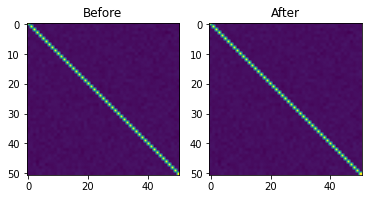

(10520, 51)

In [48]:
## Remove multicollinearity
import matplotlib.pyplot as plt
cutoff=0.9

fig, ax = plt.subplots(nrows=1,ncols=2)
Corr = Feats_nonzero.corr(method="pearson")
ax[0].imshow(Corr)
ax[0].set_title("Before")
np.fill_diagonal(Corr.values, 0)
Feats_nocoll = Feats_nonzero[[c for c in Feats_nonzero.columns if (Corr.max(axis=1).loc[c]<cutoff)]]
Corr = Feats_nocoll.corr(method="pearson")
ax[1].imshow(Corr)
ax[1].set_title("After")
plt.show()
Feats_nocoll.shape

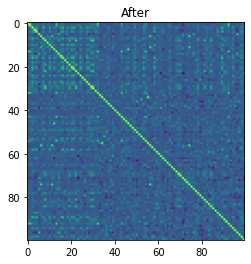

(9576, 100)

In [13]:
## "Remove multicollinearity" takes too much time for TRANSCRIPT, here is a shorter version
Ntop=100

VarGene = Feats_nonzero.var(axis=0).sort_values(ascending=False)
TopVarGene = list(VarGene.index)[:Ntop]
Feats_nocoll = Feats_nonzero[TopVarGene]
Corr = Feats_nocoll.corr(method="pearson")

import matplotlib.pyplot as plt
plt.imshow(Corr)
plt.title("After")
plt.show()
Feats_nocoll.shape

## Preprocessing

In [49]:
from sklearn.preprocessing import StandardScaler

def output_features(YY, XX):
    ## Output vector & Features
    y = np.ravel(np.array(YY.fillna(0).values))
    y[y<0] = 0
    X = np.array(XX.fillna(0).values)
    X_scal = StandardScaler().fit_transform(X)
    return X_scal, y

## Testing routine

In [50]:
## Prediction assessment: average of AUC scores for each iteration, each cross-validation

from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_validate
from sklearn.metrics import roc_curve
import random
random.seed(0)
Niter_CV=100 # number of times the cross-validation is run
Nfold_CV=5 # number of parts in cross-validation
Ntest_size=0.3 # test size proportion
Nhidden_size=0.1 # hidden drug proportion (for the validation set)

def testing_routine(MODEL, YY, XX, verbose=False, extreme_verbose=False):
    drug_list = list(set([idx.split("--")[0] for idx in XX.index]))
    seeds0 = [random.sample(range(int(1e8)),k=1)[0] for k in range(Niter_CV)]

    mean_auc_test, mean_auc_train = [None]*Niter_CV, [None]*Niter_CV
    mean_acc_test, mean_acc_train = [None]*Niter_CV, [None]*Niter_CV
    max_auc_test_di = {"fpr": None, "tpr": None}
    max_auc_test = -float("inf")

    for ns, seed0 in enumerate(seeds0):
        if (verbose):
            print("Iteration %d/%d" % (ns+1, len(seeds0)))
        random.seed(seed0)
        np.random.seed(seed0)
        hidden_drugs=random.sample(drug_list, k=int(Nhidden_size*len(drug_list))+1)
        if (extreme_verbose):
            print("%d/%d" % (len(hidden_drugs), len(drug_list)))
        cv = ShuffleSplit(n_splits=Nfold_CV, test_size=Ntest_size, random_state=seed0)

        ## Validation set
        XX_valid = XX.loc[[idx for idx in XX.index if (idx.split("--")[0] in hidden_drugs)]]
        YY_valid = YY.loc[[idx for idx in XX.index if (idx.split("--")[0] in hidden_drugs)]]

        if (extreme_verbose):
            print("Validation")
            print(XX_valid.shape)
            print(YY_valid.shape)

        ## Training/Testing sets
        XX_train_test = XX.loc[[idx for idx in XX.index if (idx.split("--")[0] not in hidden_drugs)]]
        YY_train_test = YY.loc[[idx for idx in XX.index if (idx.split("--")[0] not in hidden_drugs)]]

        if (extreme_verbose):
            print("Train/Test")
            print(XX_train_test.shape)
            print(YY_train_test.shape)

        ## Output vector & Features (Training/Testing)
        X_scal_train_test, y_train_test = output_features(YY_train_test, XX_train_test)

        ## Output vector & Features (Validation)
        X_scal_valid, y_valid = output_features(YY_valid, XX_valid)
        
        ## TODO: train/test should be split to avoid data leakage

        results_cv = cross_validate(MODEL(0), X_scal_train_test, y_train_test, cv=cv, return_train_score=True) #accuracy
        mean_acc_test[ns] = np.mean(results_cv['test_score'])
        mean_acc_train[ns] = np.mean(results_cv['train_score'])

        results_cv = cross_validate(MODEL(0), X_scal_train_test, y_train_test, cv=cv, scoring="roc_auc", return_train_score=True, return_estimator=True) #AUC
        mean_auc_test[ns] = np.mean(results_cv['test_score'])
        mean_auc_train[ns] = np.mean(results_cv['train_score'])

        max_auc_id = np.argmax(results_cv['test_score'])
        if (results_cv['test_score'][max_auc_id]>max_auc_test):
            max_estimator = results_cv['estimator'][max_auc_id]
            y_pred = max_estimator.predict(X_scal_valid)
            fpr, tpr, _ = roc_curve(y_valid, y_pred)

            max_auc_test_di.update({"fpr": fpr, "tpr": tpr})
            max_auc_test = results_cv['test_score'][max_auc_id]
        if (verbose):
            print("mean AUC on test set: %.2f\tmax AUC on test set so far: %.2f" % (mean_auc_test[ns],max_auc_test))

    print("mean AUC Train: %.2f (+- %.2f)\tTest: %.2f (+- %.2f)" % (np.mean(mean_auc_train), np.std(mean_auc_train),np.mean(mean_auc_test), np.std(mean_auc_test)))
    print("mean ACC Train: %.2f (+- %.2f)\tTest: %.2f (+- %.2f)" % (np.mean(mean_acc_train), np.std(mean_acc_train),np.mean(mean_acc_test), np.std(mean_acc_test)))
    return max_auc_test_di, max_auc_test

In [51]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

def ROC_curve(max_auc_test_di, max_auc_test):
    plt.figure()
    lw = 2
    plt.plot(
        max_auc_test_di["fpr"],
        max_auc_test_di["tpr"],
        color="darkorange",
        lw=lw,
        label="ROC curve (area = %0.2f)" % auc(max_auc_test_di["fpr"], max_auc_test_di["tpr"]),
    )
    plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC of best model on validation (test AUC = %.2f)" % max_auc_test)
    plt.legend(loc="lower right")
    plt.show()

## Methods

In [52]:
from sklearn.linear_model import LogisticRegression as Logit
params = {
    'max_iter':5000,
    'C':1.,
    'class_weight':"balanced",
    'penalty':"l2",
    'fit_intercept':True,
    'solver':"liblinear",
}
LOGIT_model = lambda x : Logit(**params, random_state=x)

In [53]:
from sklearn.naive_bayes import GaussianNB
BAYES_model = lambda x : GaussianNB()

In [54]:
from sklearn.svm import SVC
SVM_model = lambda x : SVC(C=1., kernel='rbf', random_state=x)

## Methods (applied to PREDICT dataset)

In [85]:
AA = Assocs
FF = Feats_nocoll
(AA.shape,FF.shape)

((12747, 1), (12747, 9))

mean AUC Train: 0.77 (+- 0.02)	Test: 0.75 (+- 0.02)
mean ACC Train: 0.77 (+- 0.02)	Test: 0.77 (+- 0.02)


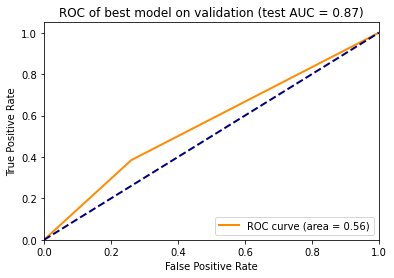

In [112]:
a, b = testing_routine(LOGIT_model, AA, FF)
ROC_curve(a,b)

mean AUC Train: 0.82 (+- 0.01)	Test: 0.81 (+- 0.02)
mean ACC Train: 0.91 (+- 0.01)	Test: 0.91 (+- 0.01)


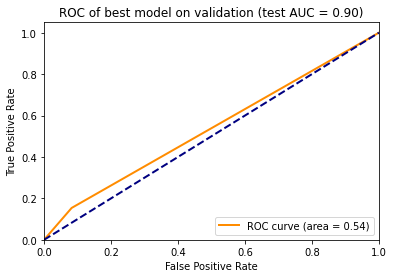

In [113]:
a, b = testing_routine(BAYES_model, AA, FF)
ROC_curve(a,b)

Iteration 1/100
mean AUC on test set: 0.87	max AUC on test set so far: 0.89
Iteration 2/100
mean AUC on test set: 0.82	max AUC on test set so far: 0.89
Iteration 3/100
mean AUC on test set: 0.81	max AUC on test set so far: 0.89
Iteration 4/100
mean AUC on test set: 0.78	max AUC on test set so far: 0.89
Iteration 5/100
mean AUC on test set: 0.82	max AUC on test set so far: 0.89
Iteration 6/100
mean AUC on test set: 0.82	max AUC on test set so far: 0.89
Iteration 7/100
mean AUC on test set: 0.80	max AUC on test set so far: 0.89
Iteration 8/100
mean AUC on test set: 0.76	max AUC on test set so far: 0.89
Iteration 9/100
mean AUC on test set: 0.75	max AUC on test set so far: 0.89
Iteration 10/100
mean AUC on test set: 0.80	max AUC on test set so far: 0.89
Iteration 11/100
mean AUC on test set: 0.81	max AUC on test set so far: 0.89
Iteration 12/100
mean AUC on test set: 0.80	max AUC on test set so far: 0.89
Iteration 13/100
mean AUC on test set: 0.76	max AUC on test set so far: 0.89
Iteratio

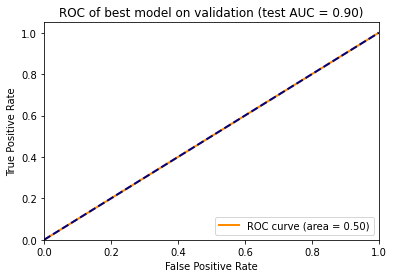

In [121]:
a, b = testing_routine(SVM_model, AA, FF, verbose=True)
ROC_curve(a,b)

## Methods (applied to TRANSCRIPT dataset)

In [17]:
AA = Assocs
FF = Feats_nocoll
(AA.shape,FF.shape)

((9576, 1), (9576, 100))

Iteration 1/100
mean AUC on test set: 0.61	max AUC on test set so far: 0.66
Iteration 2/100
mean AUC on test set: 0.63	max AUC on test set so far: 0.67
Iteration 3/100
mean AUC on test set: 0.59	max AUC on test set so far: 0.67
Iteration 4/100
mean AUC on test set: 0.67	max AUC on test set so far: 0.69
Iteration 5/100
mean AUC on test set: 0.66	max AUC on test set so far: 0.72
Iteration 6/100
mean AUC on test set: 0.66	max AUC on test set so far: 0.76
Iteration 7/100
mean AUC on test set: 0.62	max AUC on test set so far: 0.76
Iteration 8/100
mean AUC on test set: 0.66	max AUC on test set so far: 0.76
Iteration 9/100
mean AUC on test set: 0.60	max AUC on test set so far: 0.76
Iteration 10/100
mean AUC on test set: 0.62	max AUC on test set so far: 0.76
Iteration 11/100
mean AUC on test set: 0.62	max AUC on test set so far: 0.76
Iteration 12/100
mean AUC on test set: 0.65	max AUC on test set so far: 0.76
Iteration 13/100
mean AUC on test set: 0.66	max AUC on test set so far: 0.76
Iteratio

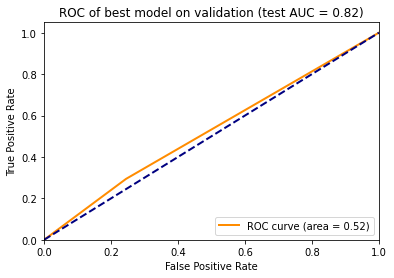

In [23]:
a, b = testing_routine(LOGIT_model, AA, FF, verbose=True)
ROC_curve(a,b)

Iteration 1/100
mean AUC on test set: 0.61	max AUC on test set so far: 0.62
Iteration 2/100
mean AUC on test set: 0.60	max AUC on test set so far: 0.62
Iteration 3/100
mean AUC on test set: 0.61	max AUC on test set so far: 0.62
Iteration 4/100
mean AUC on test set: 0.61	max AUC on test set so far: 0.63
Iteration 5/100
mean AUC on test set: 0.60	max AUC on test set so far: 0.63
Iteration 6/100
mean AUC on test set: 0.59	max AUC on test set so far: 0.63
Iteration 7/100
mean AUC on test set: 0.60	max AUC on test set so far: 0.63
Iteration 8/100
mean AUC on test set: 0.59	max AUC on test set so far: 0.63
Iteration 9/100
mean AUC on test set: 0.61	max AUC on test set so far: 0.63
Iteration 10/100
mean AUC on test set: 0.62	max AUC on test set so far: 0.63
Iteration 11/100
mean AUC on test set: 0.59	max AUC on test set so far: 0.63
Iteration 12/100
mean AUC on test set: 0.60	max AUC on test set so far: 0.63
Iteration 13/100
mean AUC on test set: 0.61	max AUC on test set so far: 0.63
Iteratio

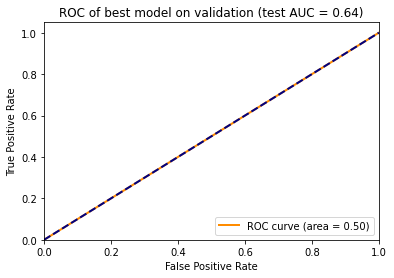

In [24]:
a, b = testing_routine(BAYES_model, AA, FF, verbose=True)
ROC_curve(a,b)

Iteration 1/100
mean AUC on test set: 0.69	max AUC on test set so far: 0.75
Iteration 2/100
mean AUC on test set: 0.65	max AUC on test set so far: 0.75
Iteration 3/100
mean AUC on test set: 0.65	max AUC on test set so far: 0.75
Iteration 4/100
mean AUC on test set: 0.63	max AUC on test set so far: 0.75
Iteration 5/100
mean AUC on test set: 0.60	max AUC on test set so far: 0.75
Iteration 6/100
mean AUC on test set: 0.63	max AUC on test set so far: 0.75
Iteration 7/100
mean AUC on test set: 0.74	max AUC on test set so far: 0.82
Iteration 8/100
mean AUC on test set: 0.69	max AUC on test set so far: 0.82
Iteration 9/100
mean AUC on test set: 0.66	max AUC on test set so far: 0.82
Iteration 10/100
mean AUC on test set: 0.68	max AUC on test set so far: 0.82
Iteration 11/100
mean AUC on test set: 0.73	max AUC on test set so far: 0.82
Iteration 12/100
mean AUC on test set: 0.67	max AUC on test set so far: 0.82
Iteration 13/100
mean AUC on test set: 0.63	max AUC on test set so far: 0.82
Iteratio

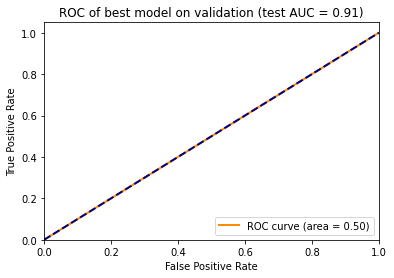

In [25]:
a, b = testing_routine(SVM_model, AA, FF, verbose=True)
ROC_curve(a,b)

## Methods (applied to Random dataset)

In [55]:
AA = Assocs
FF = Feats_nocoll
(AA.shape,FF.shape)

((10520, 1), (10520, 51))

Iteration 1/100
mean AUC on test set: 0.50	max AUC on test set so far: 0.56
Iteration 2/100
mean AUC on test set: 0.51	max AUC on test set so far: 0.56
Iteration 3/100
mean AUC on test set: 0.49	max AUC on test set so far: 0.56
Iteration 4/100
mean AUC on test set: 0.50	max AUC on test set so far: 0.56
Iteration 5/100
mean AUC on test set: 0.50	max AUC on test set so far: 0.56
Iteration 6/100
mean AUC on test set: 0.51	max AUC on test set so far: 0.58
Iteration 7/100
mean AUC on test set: 0.52	max AUC on test set so far: 0.58
Iteration 8/100
mean AUC on test set: 0.49	max AUC on test set so far: 0.58
Iteration 9/100
mean AUC on test set: 0.52	max AUC on test set so far: 0.58
Iteration 10/100
mean AUC on test set: 0.48	max AUC on test set so far: 0.58
Iteration 11/100
mean AUC on test set: 0.50	max AUC on test set so far: 0.58
Iteration 12/100
mean AUC on test set: 0.48	max AUC on test set so far: 0.58
Iteration 13/100
mean AUC on test set: 0.50	max AUC on test set so far: 0.58
Iteratio

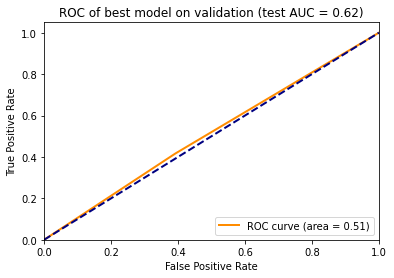

In [56]:
a, b = testing_routine(LOGIT_model, AA, FF, verbose=True)
ROC_curve(a,b)

Iteration 1/100
mean AUC on test set: 0.50	max AUC on test set so far: 0.53
Iteration 2/100
mean AUC on test set: 0.49	max AUC on test set so far: 0.55
Iteration 3/100
mean AUC on test set: 0.49	max AUC on test set so far: 0.55
Iteration 4/100
mean AUC on test set: 0.53	max AUC on test set so far: 0.60
Iteration 5/100
mean AUC on test set: 0.48	max AUC on test set so far: 0.60
Iteration 6/100
mean AUC on test set: 0.49	max AUC on test set so far: 0.60
Iteration 7/100
mean AUC on test set: 0.51	max AUC on test set so far: 0.60
Iteration 8/100
mean AUC on test set: 0.49	max AUC on test set so far: 0.60
Iteration 9/100
mean AUC on test set: 0.48	max AUC on test set so far: 0.60
Iteration 10/100
mean AUC on test set: 0.53	max AUC on test set so far: 0.60
Iteration 11/100
mean AUC on test set: 0.50	max AUC on test set so far: 0.60
Iteration 12/100
mean AUC on test set: 0.49	max AUC on test set so far: 0.60
Iteration 13/100
mean AUC on test set: 0.50	max AUC on test set so far: 0.60
Iteratio

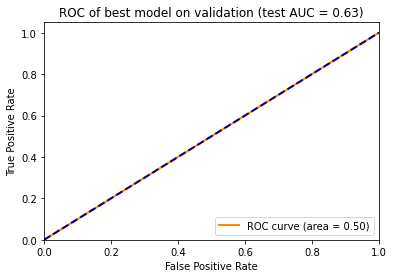

In [57]:
a, b = testing_routine(BAYES_model, AA, FF, verbose=True)
ROC_curve(a,b)

Iteration 1/100
mean AUC on test set: 0.49	max AUC on test set so far: 0.53
Iteration 2/100
mean AUC on test set: 0.46	max AUC on test set so far: 0.53
Iteration 3/100
mean AUC on test set: 0.50	max AUC on test set so far: 0.57
Iteration 4/100
mean AUC on test set: 0.50	max AUC on test set so far: 0.57
Iteration 5/100
mean AUC on test set: 0.48	max AUC on test set so far: 0.57
Iteration 6/100
mean AUC on test set: 0.49	max AUC on test set so far: 0.57
Iteration 7/100
mean AUC on test set: 0.49	max AUC on test set so far: 0.57
Iteration 8/100
mean AUC on test set: 0.46	max AUC on test set so far: 0.57
Iteration 9/100
mean AUC on test set: 0.49	max AUC on test set so far: 0.57
Iteration 10/100
mean AUC on test set: 0.46	max AUC on test set so far: 0.57
Iteration 11/100
mean AUC on test set: 0.45	max AUC on test set so far: 0.57
Iteration 12/100
mean AUC on test set: 0.49	max AUC on test set so far: 0.57
Iteration 13/100
mean AUC on test set: 0.48	max AUC on test set so far: 0.57
Iteratio

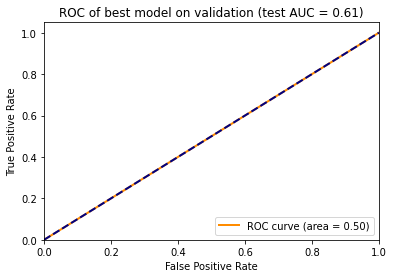

In [58]:
a, b = testing_routine(SVM_model, AA, FF, verbose=True)
ROC_curve(a,b)